In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from itertools import product

pd.set_option("display.max_rows", 1000)

exp_path = Path("../experiments/issue_18_infomax_extpic/")
tex_path = exp_path / "tex_files"
tex_path.mkdir(exist_ok=True, parents=True)

In [2]:
!ls /home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_bk_2/results/

 1   5	 9		    logs_jade	    logs_picard     results_final.csv
 2   6	 logs_ext_infomax   logs_none	    logs_picard_o
 3   7	 logs_fastica	   'logs_orica 0'   logs_sobi
 4   8	 logs_infomax	   'logs_orica 1'   results.csv


In [3]:
# full_df = pd.read_csv("/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18/results/results_final.csv").rename(columns=dict(trial="run"))
orig_path = Path("/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_newrun/results/results_final.csv")
# orig_path = Path("/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/results_final.csv")

full_df = (
    pd.read_csv(orig_path)
    .rename(columns=dict(trial="run"))
)
uids = full_df.uid.unique()
full_df = full_df[~full_df.algorithm.isin(["pca", "whitening"])]
full_df.columns
# full_df = pd.read_csv("/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_19/results.csv")

Index(['test_cohen_kappa_score', 'test_balanced_accuracy_score',
       'test_micro_f1', 'test_micro_precision', 'test_micro_recall', 'uid',
       'run', 'algorithm', 'duplicated'],
      dtype='object')

In [4]:
full_df.algorithm.unique()

array(['None', 'ORICA (0)', 'ORICA (1)', 'Ext. Infomax', 'Infomax',
       'SOBI', 'JADE', 'Picard', 'FastICA', 'picard_o'], dtype=object)

In [5]:
def alg_rename(alg_name):
    alg_rename_dict = {
        "ext_infomax": "Ext. Infomax",
        "infomax": "Infomax",
        "none": "None",
        "picard": "Picard",
        "ext_picard": "Extended Picard",
        "picard_o": "Picard-O",
        "orica 0": "ORICA (0)",
        "orica 1": "ORICA (1)",
        "Orica (0)": "ORICA (0)",
        "Orica (1)": "ORICA (1)",
        "jade": "JADE",
        "sobi": "SOBI",
        "fastica": "FastICA",
    }
    return alg_rename_dict.get(alg_name, alg_name)
full_df["algorithm"] = full_df.algorithm.apply(alg_rename)

In [6]:
final_path = Path("/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18/results/results_final.csv")
orig_path = Path("/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_bk/results/results_final.csv")
pd.read_csv(orig_path).algorithm.unique()

array(['None', 'ORICA (0)', 'ORICA (1)', 'Ext. Infomax', 'Infomax',
       'SOBI', 'JADE', 'Picard', 'FastICA', 'picard_o'], dtype=object)

In [7]:
full_df.run.unique(), full_df.uid.unique()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [8]:
subset = list(set(full_df.columns) - set(["run"]))

full_df[full_df.duplicated(subset=subset, keep=False)].sort_values(by=subset).shape

(128, 9)

In [9]:
full_df.algorithm.unique()

array(['None', 'ORICA (0)', 'ORICA (1)', 'Ext. Infomax', 'Infomax',
       'SOBI', 'JADE', 'Picard', 'FastICA', 'Picard-O'], dtype=object)

In [10]:
#full_df.to_csv("formatted.csv")
# !python ../ica_benchmark/visualization/multiple_runs.py -path /home/paulo/Documents/GIT/BCI_MsC/experiments/issue_32/results/results.csv -save_folder ../experiments/issue_32/plots
# !python ../ica_benchmark/visualization/multiple_runs.py -path ./formatted.csv -save_folder ../experiments/issue_32/plots

In [11]:
df = full_df#.groupby(["uid", "classifier", "algorithm"], as_index=False).mean()
metric = "test_cohen_kappa_score"

# Best combination

In [12]:
sorted_all = df.groupby(["uid", "algorithm"], as_index=False).agg(["mean", "std"]).reset_index()#[["uid", "Kappa"]]
sorted_all["order"] = sorted_all.groupby("uid").rank(ascending=False)[(metric, "mean")]
ranked_df_list = list()
for uid in sorted_all.uid.unique():
    uid_df = sorted_all[sorted_all.uid == uid]
    max_rank = uid_df.order.min()
    r_df = uid_df[uid_df.order == max_rank][["uid", "algorithm", metric]].round(3)
    ranked_df_list.append(r_df)
ranked_df = pd.concat(ranked_df_list).sort_values(by="uid")
ranked_df

/tmp/ipykernel_93179/1590463864.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  sorted_all["order"] = sorted_all.groupby("uid").rank(ascending=False)[(metric, "mean")]


uid  algorithm test_cohen_kappa_score       
                                    mean    std
9    1       SOBI                  0.687  0.042
15   2  ORICA (0)                  0.268  0.038
24   3       None                  0.779  0.049
37   4     Picard                  0.375  0.041
45   5  ORICA (0)                  0.307  0.103
54   6       None                  0.279  0.041
64   7       None                  0.540  0.055
79   8       SOBI                  0.685  0.047
84   9       None                  0.726  0.042

In [13]:
ranked_df.to_latex(tex_path / "best_combination.tex", index=False)

/tmp/ipykernel_93179/4233368133.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  ranked_df.to_latex(tex_path / "best_combination.tex", index=False)


# Best ICA's

In [14]:
sorted_alg = df.groupby(["uid", "algorithm"], as_index=False).agg([np.mean, np.std])[metric].sort_values(by=["uid", "mean"]).reset_index()
sorted_alg["order"] = sorted_alg.groupby("uid").rank(ascending=False)["mean"]
sorted_alg

,uid,algorithm,mean,std,order
0,1,ORICA (0),0.548611,0.087467,10.0
1,1,ORICA (1),0.559259,0.063471,9.0
2,1,Ext. Infomax,0.613889,0.063748,8.0
3,1,Infomax,0.634259,0.045779,6.5
4,1,Picard,0.634259,0.040537,6.5
5,1,JADE,0.646759,0.057122,5.0
6,1,Picard-O,0.649074,0.049805,4.0
7,1,FastICA,0.668981,0.033545,3.0
8,1,None,0.673611,0.021300,2.0
9,1,SOBI,0.686574,0.042153,1.0


In [15]:
ranked_df_list = list()
for uid in sorted_alg.uid.unique():
    uid_df = sorted_alg.query("uid == @uid")
    max_rank = uid_df.order.min()
    r_df = uid_df.query("order == @max_rank")[["uid", "algorithm", "mean", "std"]].round(3)
    ranked_df_list.append(r_df)
ranked_df = pd.concat(ranked_df_list).sort_values(by="uid")
ranked_df

,uid,algorithm,mean,std
9,1,SOBI,0.687,0.042
19,2,ORICA (0),0.268,0.038
29,3,None,0.779,0.049
39,4,Picard,0.375,0.041
49,5,ORICA (0),0.307,0.103
59,6,None,0.279,0.041
69,7,None,0.540,0.055
79,8,SOBI,0.685,0.047
89,9,None,0.726,0.042


In [16]:
ranked_df.to_latex(tex_path / "best_alg.tex", index=False)

/tmp/ipykernel_93179/1770953152.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  ranked_df.to_latex(tex_path / "best_alg.tex", index=False)


In [17]:
order_df = sorted_alg.groupby("algorithm").median()[["order"]].sort_values(by="order").reset_index()
order_df

,algorithm,order
0,None,2.0
1,FastICA,3.0
2,JADE,5.0
3,Picard-O,5.0
4,SOBI,5.0
5,Ext. Infomax,6.0
6,Infomax,6.0
7,Picard,6.0
8,ORICA (0),7.0
9,ORICA (1),9.0


In [18]:
order_df.to_latex(tex_path / "best_alg_median_rank.tex", index=False)

/tmp/ipykernel_93179/2213213182.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  order_df.to_latex(tex_path / "best_alg_median_rank.tex", index=False)


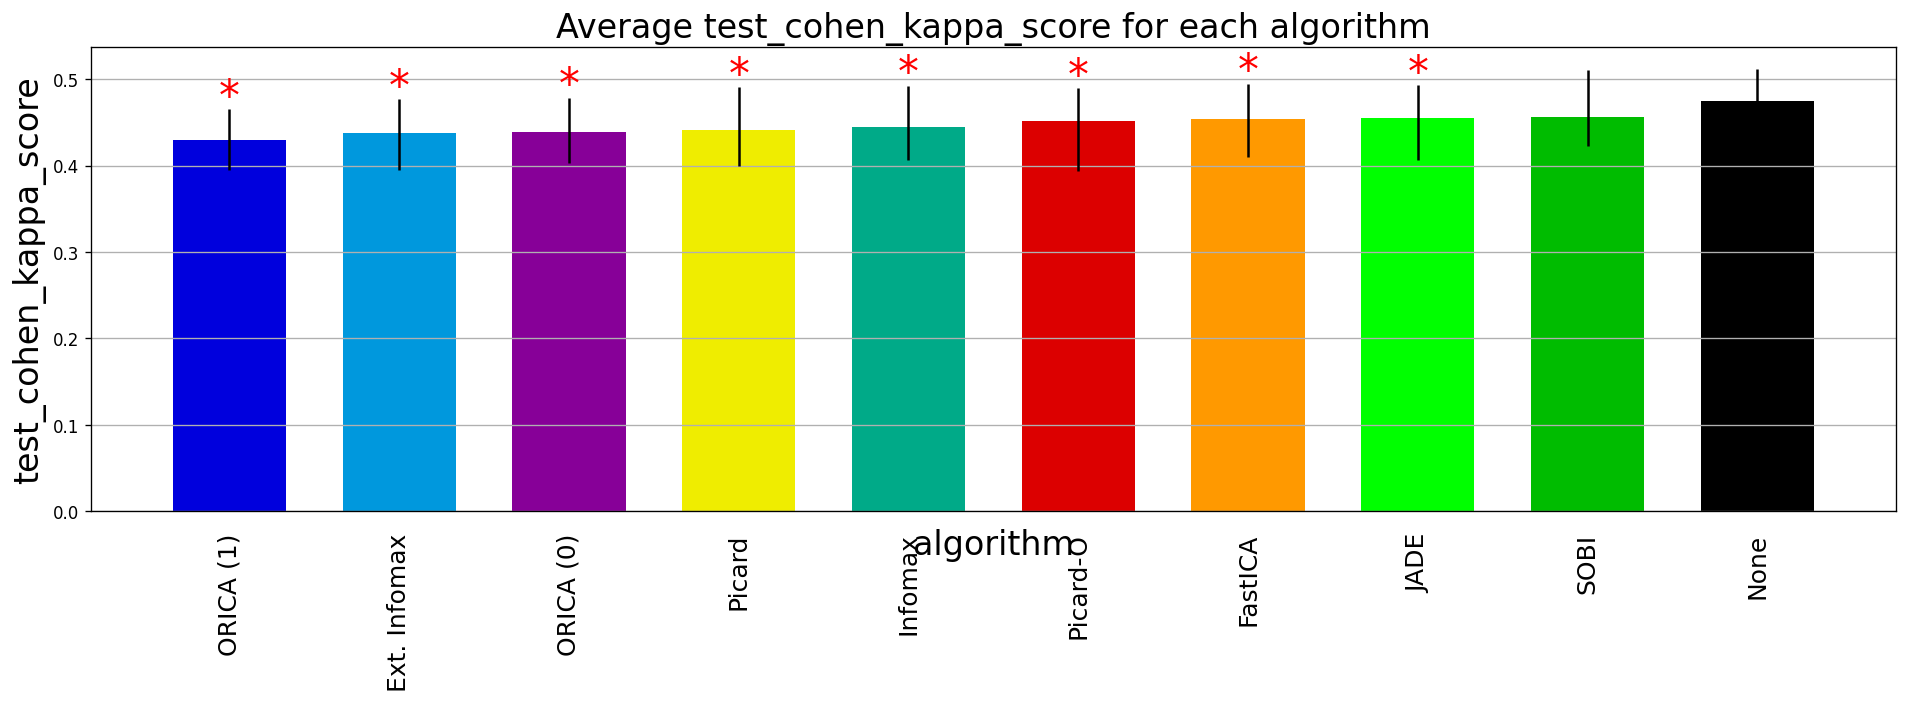

In [19]:
from ica_benchmark.visualization.multiple_runs import average_barplot, detailed_barplot

average_barplot(
    full_df,
    x_col='algorithm',
    key_cols=['run'],
    grouping_cols=["uid"],
    val_col='test_cohen_kappa_score',
    save_filepath=None,
    w=5,
    cmap='nipy_spectral',
    x_label=None,
    n_boots=100,
    
)

/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approxi

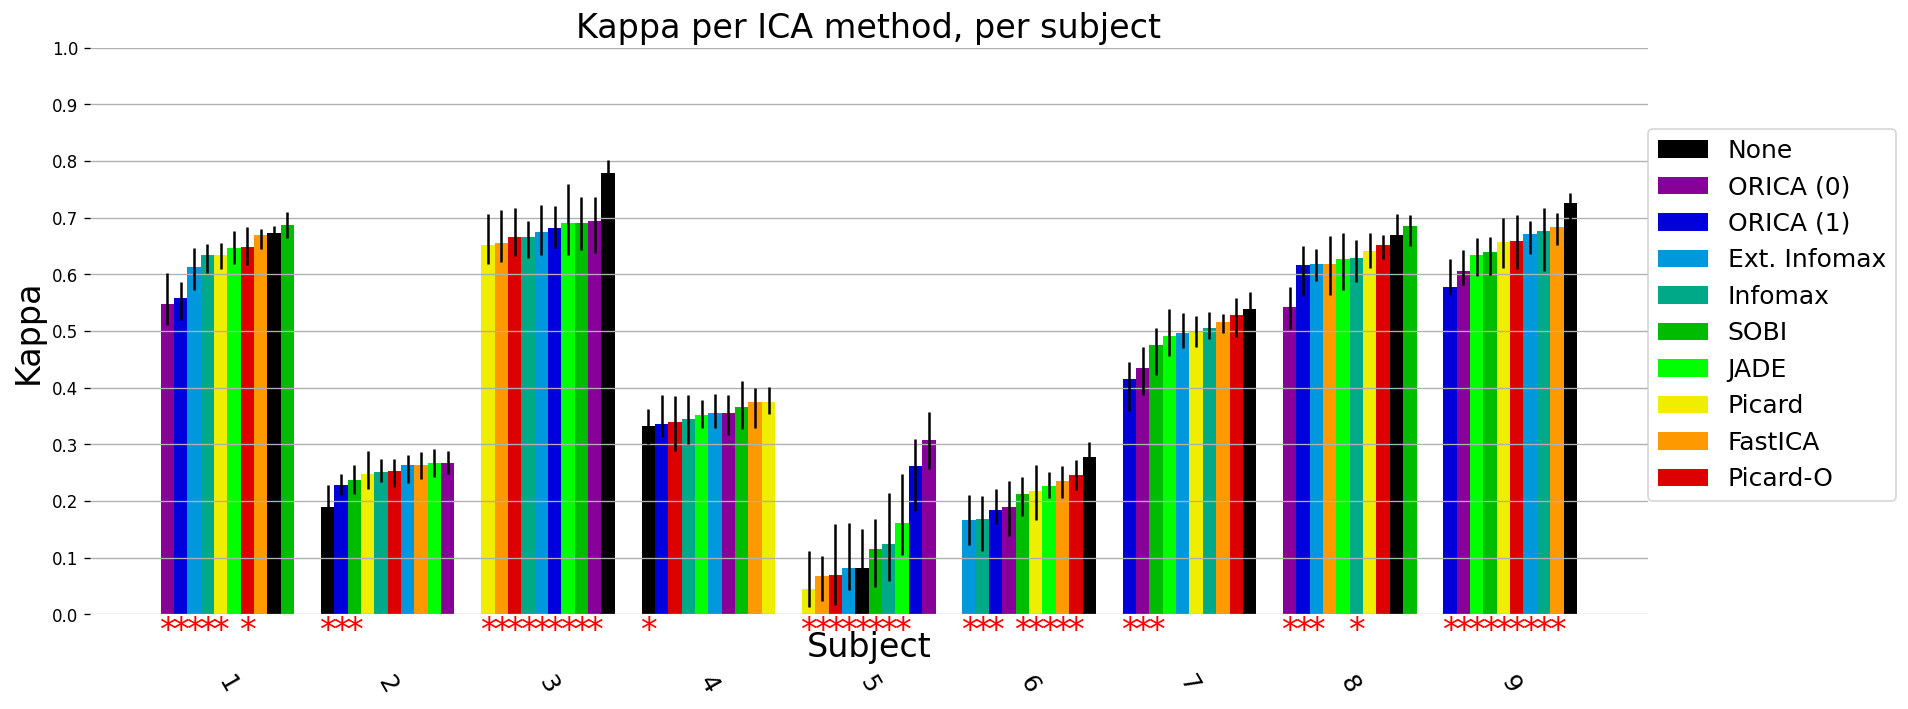

In [20]:
detailed_barplot(
    full_df,
    x_col='uid',
    hue_col='algorithm',
    val_col=metric,
    key_cols='run',
    save_filepath=None,
    w=5,
    cmap='nipy_spectral',
    x_label="Subject",
    title="Kappa per ICA method, per subject",
    y_label="Kappa",
    figsize=(16, 6)
)

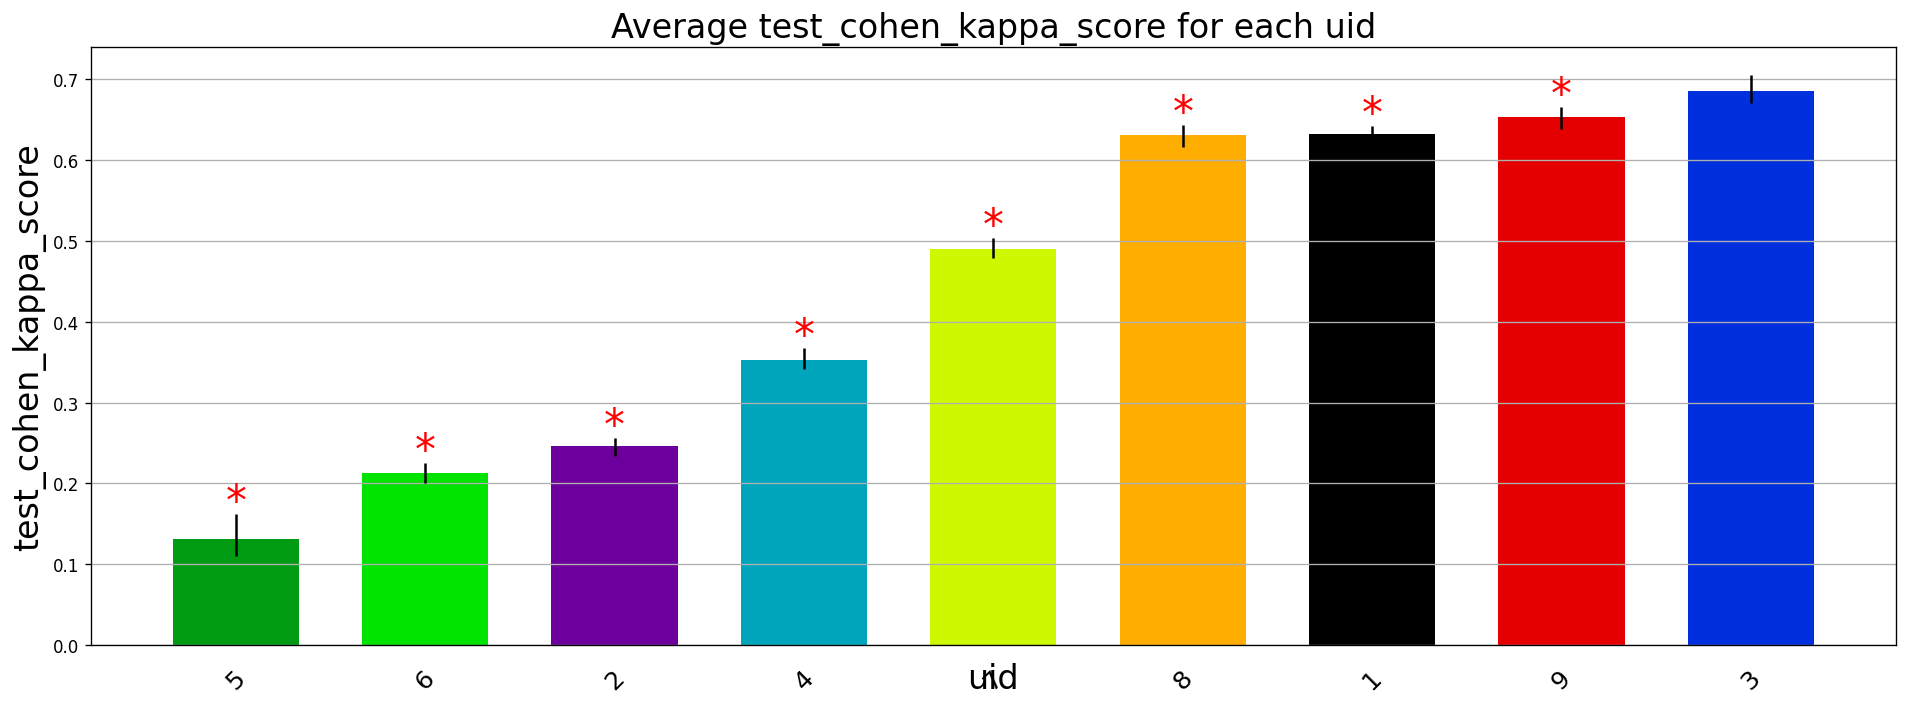

In [21]:
average_barplot(
    full_df,
    x_col='uid',
    key_cols=['run'],
    grouping_cols=["algorithm"],
    val_col='test_cohen_kappa_score',
    save_filepath=None,
    w=5,
    cmap='nipy_spectral',
    x_label=None,
    n_boots=100,
    label_rotation=45
)

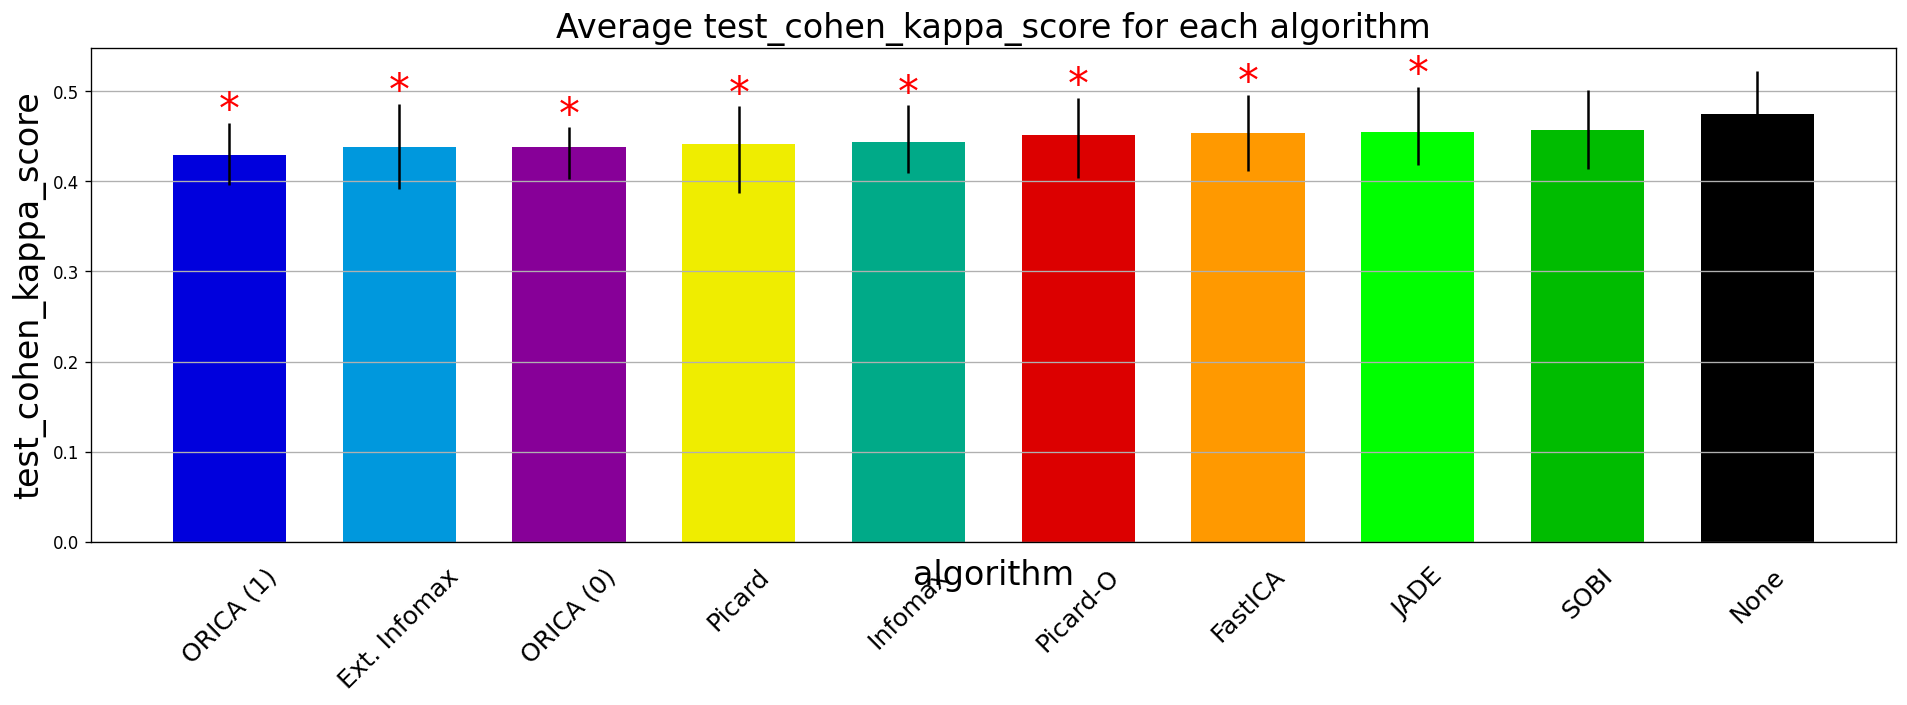

In [22]:
average_barplot(
    full_df,
    x_col='algorithm',
    key_cols=['run'],
    grouping_cols=["uid"],
    val_col='test_cohen_kappa_score',
    save_filepath=None,
    w=5,
    cmap='nipy_spectral',
    x_label=None,
    n_boots=100,
    label_rotation=45
)

In [23]:
df =(
    full_df
    .groupby(["uid", "algorithm"], as_index=False).mean()
    .groupby(["algorithm"], as_index=False)
    .agg([np.mean, np.std])
    .test_cohen_kappa_score
    .sort_values(by="mean", ascending=False)
    .round(3)
    .reset_index()
)    
display(df)
df.to_latex(tex_path / "alg_avg.tex", index=False)

,algorithm,mean,std
0,None,0.475,0.258
1,SOBI,0.457,0.231
2,JADE,0.455,0.206
3,FastICA,0.454,0.226
4,Picard-O,0.451,0.227
5,Infomax,0.444,0.225
6,Picard,0.441,0.229
7,ORICA (0),0.439,0.170
8,Ext. Infomax,0.438,0.228
9,ORICA (1),0.429,0.186


/tmp/ipykernel_93179/2780303622.py:12: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex(tex_path / "alg_avg.tex", index=False)


In [24]:
def load_metric_log(path, algorithm, uid, run, col=None):
    col = col or "train_cohen_kappa_score"
    
    csv_filepath = path / f"logs_{algorithm}"
    csv_filepath /= f"subject_{uid}"
    csv_filepath /= f"trial_{run}"
    csv_filepath /= "metrics.csv"
    print(csv_filepath)
    df = pd.read_csv(csv_filepath)
    df = df.dropna(subset=[col])
    
    return df

# path = Path("/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18/results")

path = Path("/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/")


ica_methods = [
    "none",
    "orica 0",
    "orica 1",
    "ext_infomax",
    "infomax",
    "sobi",
    "jade",
    "picard",
    "fastica",
    "picard_o",
    # "whitening",
    # "pca",
]

cnt_dict_list = list()

for algorithm, uid, run in product(ica_methods, range(1, 10), range(10)):
    
    metric = "test_cohen_kappa_score"
    df = load_metric_log(path, algorithm, uid, run, col=metric)
    test_kappa = load_metric_log(path, algorithm, uid, run, col=metric)[metric].item()
    cnt_dict_list.append(
        dict(
            algorithm=algorithm,
            uid=uid,
            run=run,
            epochs=df.epoch.max(),
            kappa=test_kappa
        )
    )
cnt_df = pd.DataFrame.from_records(cnt_dict_list)
cnt_df["algorithm"] = cnt_df.algorithm.apply(alg_rename)
# !ls /home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18/results/logs_fastica/
# 

/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_none/subject_1/trial_0/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_none/subject_1/trial_0/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_none/subject_1/trial_1/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_none/subject_1/trial_1/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_none/subject_1/trial_2/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_none/subject_1/trial_2/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_none/subject_1/trial_3/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_none/subject_1/trial_3/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_i

/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_none/subject_6/trial_9/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_none/subject_7/trial_0/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_none/subject_7/trial_0/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_none/subject_7/trial_1/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_none/subject_7/trial_1/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_none/subject_7/trial_2/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_none/subject_7/trial_2/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_none/subject_7/trial_3/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_i

/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 0/subject_3/trial_9/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 0/subject_3/trial_9/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 0/subject_4/trial_0/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 0/subject_4/trial_0/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 0/subject_4/trial_1/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 0/subject_4/trial_1/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 0/subject_4/trial_2/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 0/subject_4/trial_2/metrics.csv
/home/paulo/Documents/GIT/BCI_Ms

/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 0/subject_7/trial_4/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 0/subject_7/trial_4/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 0/subject_7/trial_5/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 0/subject_7/trial_5/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 0/subject_7/trial_6/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 0/subject_7/trial_6/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 0/subject_7/trial_7/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 0/subject_7/trial_7/metrics.csv
/home/paulo/Documents/GIT/BCI_Ms

/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 1/subject_4/trial_5/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 1/subject_4/trial_5/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 1/subject_4/trial_6/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 1/subject_4/trial_6/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 1/subject_4/trial_7/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 1/subject_4/trial_7/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 1/subject_4/trial_8/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 1/subject_4/trial_8/metrics.csv
/home/paulo/Documents/GIT/BCI_Ms

/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 1/subject_8/trial_0/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 1/subject_8/trial_1/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 1/subject_8/trial_1/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 1/subject_8/trial_2/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 1/subject_8/trial_2/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 1/subject_8/trial_3/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 1/subject_8/trial_3/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_orica 1/subject_8/trial_4/metrics.csv
/home/paulo/Documents/GIT/BCI_Ms

/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_ext_infomax/subject_2/trial_4/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_ext_infomax/subject_2/trial_5/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_ext_infomax/subject_2/trial_5/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_ext_infomax/subject_2/trial_6/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_ext_infomax/subject_2/trial_6/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_ext_infomax/subject_2/trial_7/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_ext_infomax/subject_2/trial_7/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_ext_infomax/subject_2/trial_8/metrics.csv


/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_ext_infomax/subject_5/trial_8/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_ext_infomax/subject_5/trial_9/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_ext_infomax/subject_5/trial_9/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_ext_infomax/subject_6/trial_0/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_ext_infomax/subject_6/trial_0/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_ext_infomax/subject_6/trial_1/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_ext_infomax/subject_6/trial_1/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_ext_infomax/subject_6/trial_2/metrics.csv


/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_infomax/subject_3/trial_0/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_infomax/subject_3/trial_0/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_infomax/subject_3/trial_1/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_infomax/subject_3/trial_1/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_infomax/subject_3/trial_2/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_infomax/subject_3/trial_2/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_infomax/subject_3/trial_3/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_infomax/subject_3/trial_3/metrics.csv
/home/paulo/Documents/GIT/BCI_Ms

/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_infomax/subject_9/trial_2/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_infomax/subject_9/trial_2/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_infomax/subject_9/trial_3/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_infomax/subject_9/trial_3/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_infomax/subject_9/trial_4/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_infomax/subject_9/trial_4/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_infomax/subject_9/trial_5/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_infomax/subject_9/trial_5/metrics.csv
/home/paulo/Documents/GIT/BCI_Ms

/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_sobi/subject_6/trial_3/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_sobi/subject_6/trial_3/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_sobi/subject_6/trial_4/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_sobi/subject_6/trial_4/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_sobi/subject_6/trial_5/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_sobi/subject_6/trial_5/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_sobi/subject_6/trial_6/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_sobi/subject_6/trial_6/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_i

/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_jade/subject_3/trial_6/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_jade/subject_3/trial_7/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_jade/subject_3/trial_7/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_jade/subject_3/trial_8/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_jade/subject_3/trial_8/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_jade/subject_3/trial_9/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_jade/subject_3/trial_9/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_jade/subject_4/trial_0/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_i

/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_picard/subject_1/trial_1/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_picard/subject_1/trial_2/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_picard/subject_1/trial_2/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_picard/subject_1/trial_3/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_picard/subject_1/trial_3/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_picard/subject_1/trial_4/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_picard/subject_1/trial_4/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_picard/subject_1/trial_5/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experi

/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_picard/subject_7/trial_5/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_picard/subject_7/trial_5/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_picard/subject_7/trial_6/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_picard/subject_7/trial_6/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_picard/subject_7/trial_7/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_picard/subject_7/trial_7/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_picard/subject_7/trial_8/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_picard/subject_7/trial_8/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experi

/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_fastica/subject_4/trial_4/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_fastica/subject_4/trial_5/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_fastica/subject_4/trial_5/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_fastica/subject_4/trial_6/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_fastica/subject_4/trial_6/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_fastica/subject_4/trial_7/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_fastica/subject_4/trial_7/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_fastica/subject_4/trial_8/metrics.csv
/home/paulo/Documents/GIT/BCI_Ms

/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_fastica/subject_7/trial_8/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_fastica/subject_7/trial_9/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_fastica/subject_7/trial_9/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_fastica/subject_8/trial_0/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_fastica/subject_8/trial_0/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_fastica/subject_8/trial_1/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_fastica/subject_8/trial_1/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_fastica/subject_8/trial_2/metrics.csv
/home/paulo/Documents/GIT/BCI_Ms

/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_picard_o/subject_5/trial_2/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_picard_o/subject_5/trial_3/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_picard_o/subject_5/trial_3/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_picard_o/subject_5/trial_4/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_picard_o/subject_5/trial_4/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_picard_o/subject_5/trial_5/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_picard_o/subject_5/trial_5/metrics.csv
/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_infomax_extpic/results/logs_picard_o/subject_5/trial_6/metrics.csv
/home/paulo/Documents/GI

In [25]:
cnt_df.algorithm.unique()

array(['None', 'ORICA (0)', 'ORICA (1)', 'Ext. Infomax', 'Infomax',
       'SOBI', 'JADE', 'Picard', 'FastICA', 'Picard-O'], dtype=object)

In [26]:
from itertools import product

df = pd.read_csv(f"/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_newrun/results/results.csv")

uid = 1
run = 0
algorithm = "none"

for uid, algorithm, run in product(df.uid.unique(), df.algorithm.unique(), df.run.unique()):
    a = pd.read_csv(f"/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_newrun/results/logs_{algorithm}/subject_{uid}/trial_{run}/metrics.csv").test_cohen_kappa_score.dropna().item()
    b = df.query("(uid == @uid) & (algorithm == @algorithm) & (run == @run)").test_cohen_kappa_score.dropna().item()
#     print(a, b)
    assert a == b

In [27]:
a = cnt_df.merge(full_df[["algorithm", "uid", "run", "test_cohen_kappa_score"]], on=["algorithm", "uid", "run"])
(a.kappa == a.test_cohen_kappa_score).mean()

0.9944444444444445

In [28]:
# cnt_df.groupby(["uid", "algorithm"]).agg([np.median, np.mean, np.std]).sort_values(by=["uid", ('epochs', 'mean')])
epoch_df = (
    cnt_df
    .groupby("algorithm", as_index=False)
    .agg([np.median, np.mean, np.std])
    .sort_values(by=[('epochs', 'mean')])
    .loc[:, ["epochs", "kappa"]]
    .round(3)
)
epoch_df.epochs = epoch_df.epochs.round(1)
epoch_df = epoch_df.sort_values(by=[("epochs", "median")], ascending=False)
epoch_df

epochs                kappa              
             median   mean    std median   mean    std
algorithm                                             
None          492.5  523.1  262.5  0.512  0.475  0.252
Picard        335.0  406.4  251.5  0.512  0.441  0.225
Ext. Infomax  322.5  398.4  232.1  0.484  0.438  0.225
JADE          312.5  385.3  229.7  0.495  0.455  0.207
SOBI          312.5  406.1  270.5  0.502  0.457  0.229
Infomax       305.0  391.2  221.7  0.493  0.444  0.224
ORICA (0)     300.0  375.9  203.2  0.435  0.439  0.178
Picard-O      295.0  389.8  226.4  0.512  0.451  0.225
FastICA       290.0  393.5  246.2  0.509  0.454  0.222
ORICA (1)     245.0  334.3  190.6  0.456  0.429  0.188

Fastest convergence

In [29]:
agg_df = (
    cnt_df
    .groupby(["uid", "algorithm"], as_index=False)
    .agg([np.median, np.mean, np.std])
    .sort_values(by=[('epochs', 'median')], ascending=True)
    .reset_index()
    .drop_duplicates(subset=[("uid", "")])
    .loc[:, ["uid", "algorithm", "epochs", "kappa"]]
    .sort_values(by=[('uid', "")])
    .round(3)
)
display(agg_df)

# plt.scatter(agg_df.epochs["mean"], agg_df.kappa["mean"], c=agg_df.algorithm.astype("category").cat.codes)
# plt.scatter(agg_df.epochs["mean"], agg_df.kappa["mean"])


uid  algorithm epochs                  kappa              
                  median   mean      std median   mean    std
44   1  ORICA (1)  325.0  322.5  104.967  0.576  0.559  0.063
0    2       SOBI  155.0  175.0   50.332  0.231  0.237  0.045
49   3    FastICA  352.5  450.0  272.407  0.644  0.656  0.084
6    4       SOBI  182.5  184.5   27.933  0.373  0.366  0.084
25   5  ORICA (1)  237.5  291.5  192.326  0.289  0.262  0.106
2    6  ORICA (1)  172.5  181.5   50.555  0.187  0.184  0.044
32   7    FastICA  272.5  285.0   58.166  0.519  0.515  0.032
57   8       JADE  415.0  425.5  106.025  0.655  0.627  0.078
62   9  ORICA (1)  510.0  491.5  237.312  0.576  0.579  0.053

In [30]:
epoch_df.to_latex(tex_path / "n_epochs.tex", index=True)

/tmp/ipykernel_93179/542211374.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  epoch_df.to_latex(tex_path / "n_epochs.tex", index=True)


/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approxi

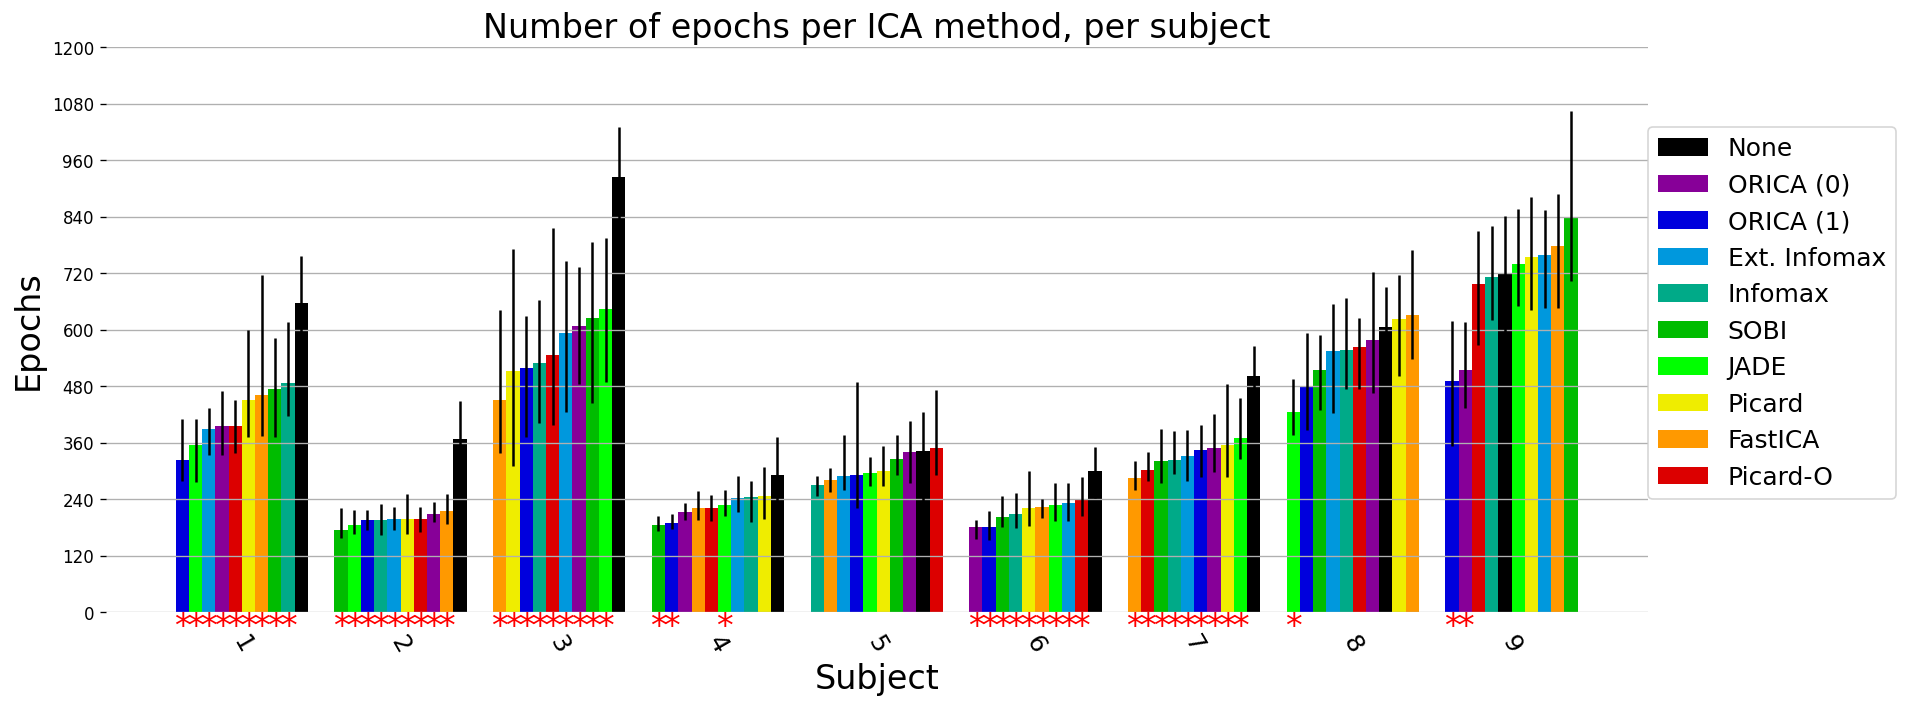

In [31]:
detailed_barplot(
    cnt_df,
    x_col='uid',
    hue_col='algorithm',
    val_col="epochs",
    key_cols='run',
    save_filepath=None,
    w=5,
    cmap='nipy_spectral',
    x_label="Subject",
    y_label="Epochs",
    title="Number of epochs per ICA method, per subject",
    ylim=(0, 1200),
    ast_loc=(-30, 10),
    labelpad=30,
    tick_pad=-40
)

In [33]:
def load_metric_log(path, algorithm, uid, run, col=None):
    col = col or "train_cohen_kappa_score"
    
    csv_filepath = path / f"logs_{algorithm}"
    csv_filepath /= f"subject_{uid}"
    csv_filepath /= f"trial_{run}"
    csv_filepath /= "metrics.csv"
    df = pd.read_csv(csv_filepath)
    df = df.dropna(subset=[col])
    
    return csv_filepath, df

path = Path("/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18/results")

loss_df_list = list()

for algorithm, uid, run in product(ica_methods, range(1, 10), range(10)):
    
    metric = "val_loss"
    csv_filepath, df = load_metric_log(path, algorithm, uid, run, col=metric)
    df = df[["epoch", metric]]
    df["uid"] = uid
    df["algorithm"] = algorithm
    df["run"] = run
    df["filepath"] = "/".join(csv_filepath.parts[-4:])
    assert df.epoch.min() == 4
    loss_df_list.append(df)

loss_df = pd.concat(loss_df_list, axis=0)
loss_df["algorithm"] = loss_df.algorithm.apply(alg_rename)


/tmp/ipykernel_93179/3593422304.py:5: FutureWarning: ['filepath'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df = loss_df.groupby(["uid", "algorithm", "epoch"]).agg([np.mean, np.std, "count"]).reset_index()


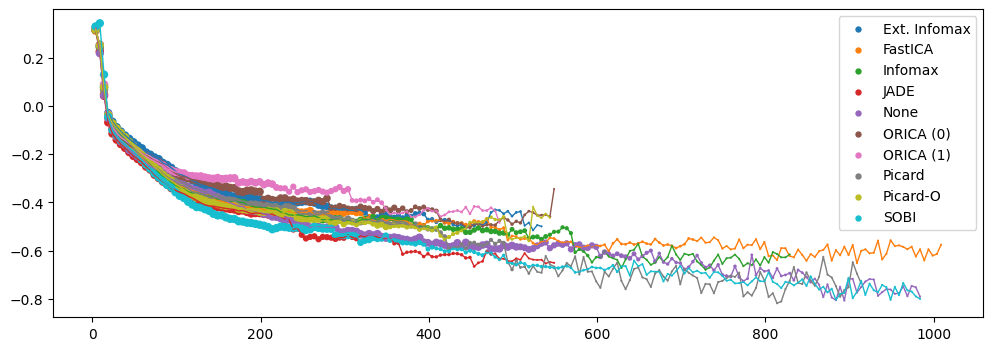

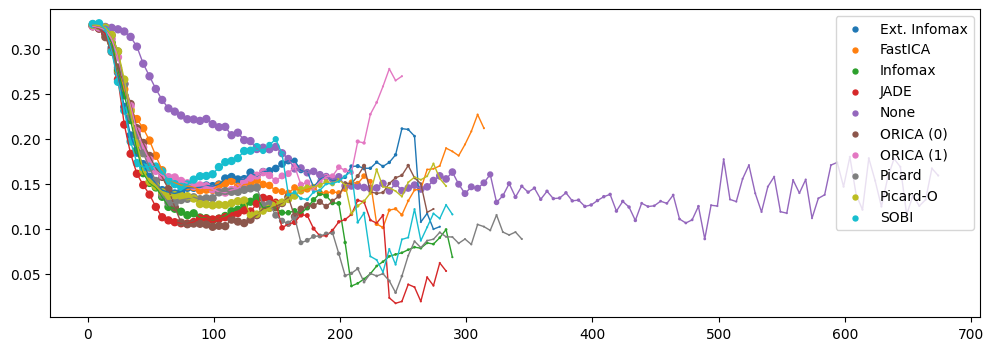

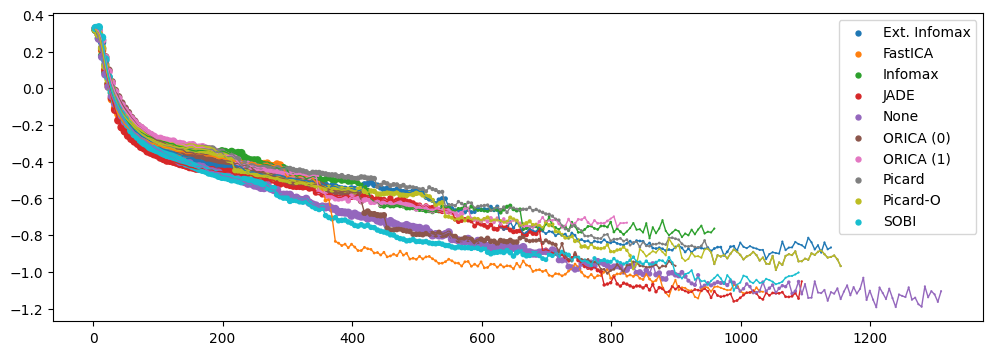

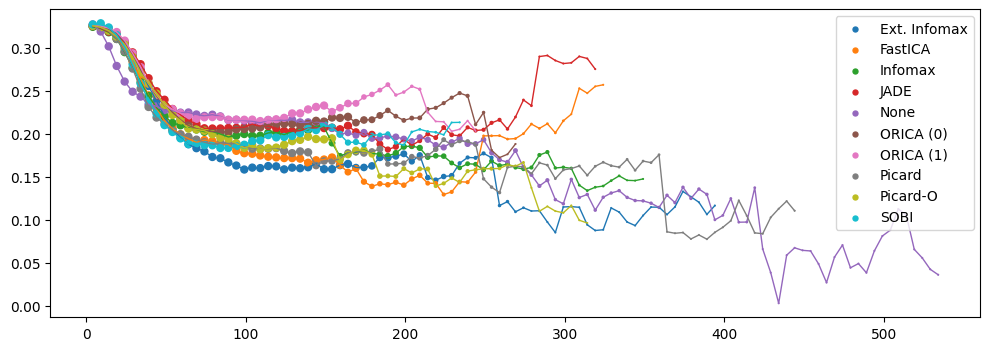

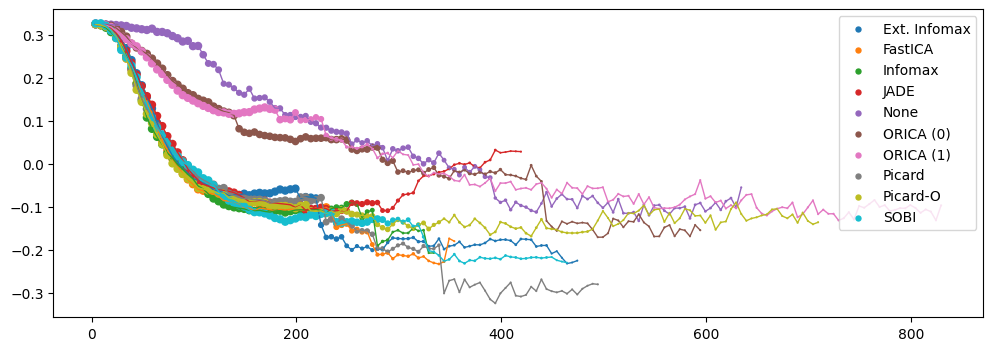

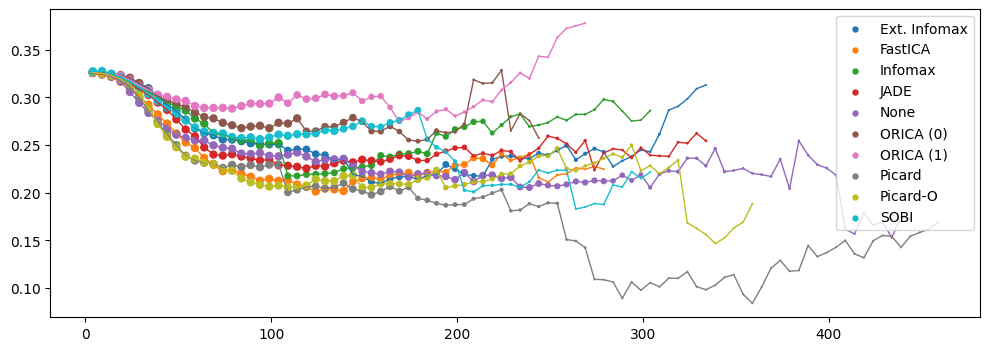

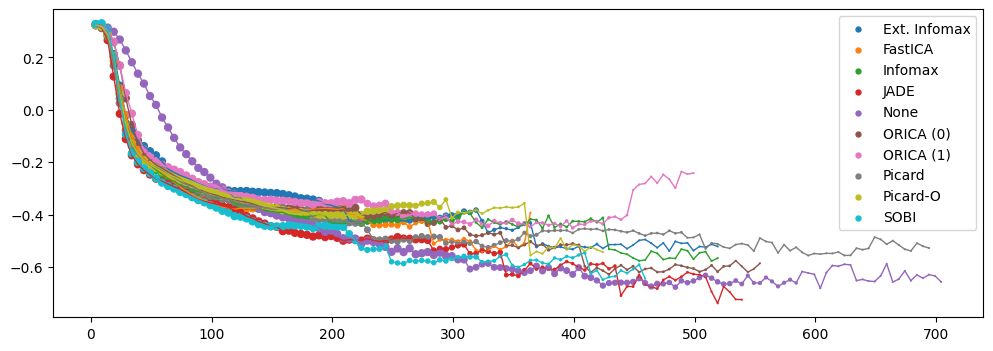

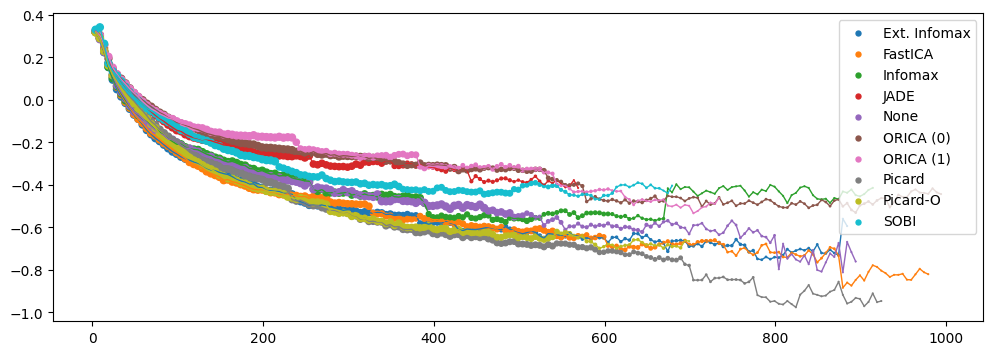

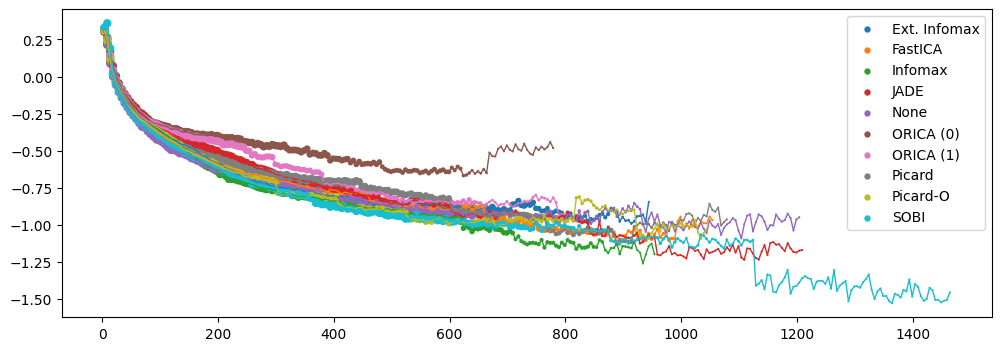

In [34]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


df = loss_df.groupby(["uid", "algorithm", "epoch"]).agg([np.mean, np.std, "count"]).reset_index()
for uid in df.uid.unique():
    fig = plt.figure(figsize=(12, 4))
    uid_df = df[df.uid == uid]
    for alg in uid_df.algorithm.unique():
        
        alg_df = uid_df[uid_df.algorithm == alg]
        alg_df = alg_df.sort_values(by="epoch")
        x = alg_df.epoch

        y = np.log(alg_df.val_loss["mean"])
        std = np.log(alg_df.val_loss["std"])
        cnt = alg_df.val_loss["count"]

        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = LineCollection(segments, linewidths=cnt/2)

        assert len(x) == len(y)
        assert len(x) == len(std)
#         plt.gca().add_collection(lc)
        plt.scatter(x, y, label=alg, s=cnt**2/4)
        plt.plot(x, y, linewidth=1)
#         plt.fill_between(x, y - std / 2, y + std / 2, alpha=.3)
    plt.legend()
    plt.show()

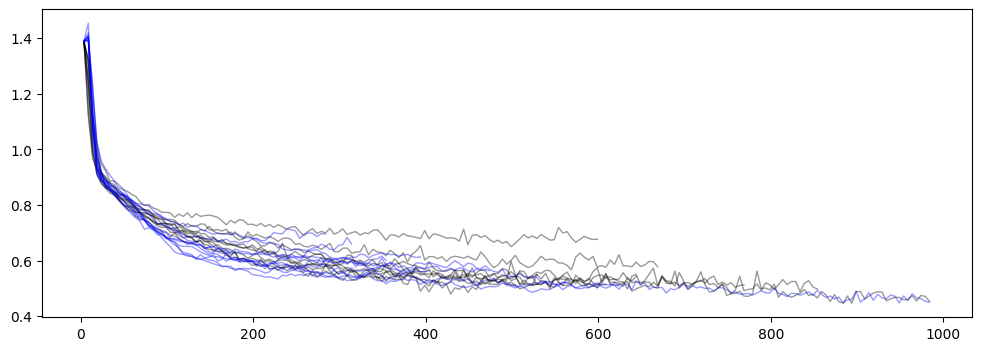

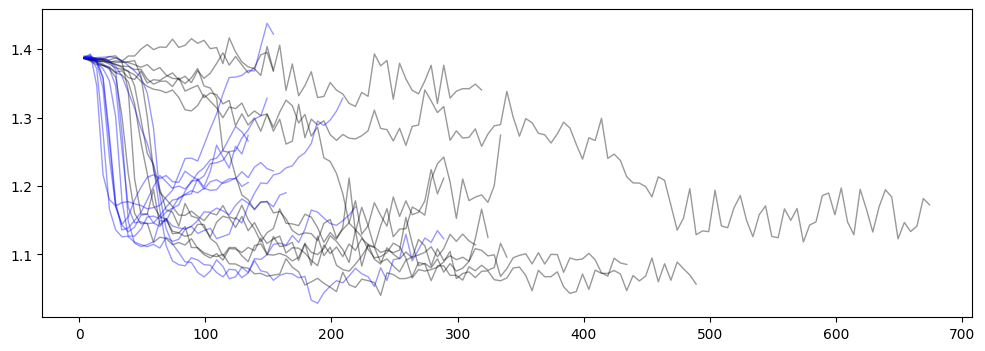

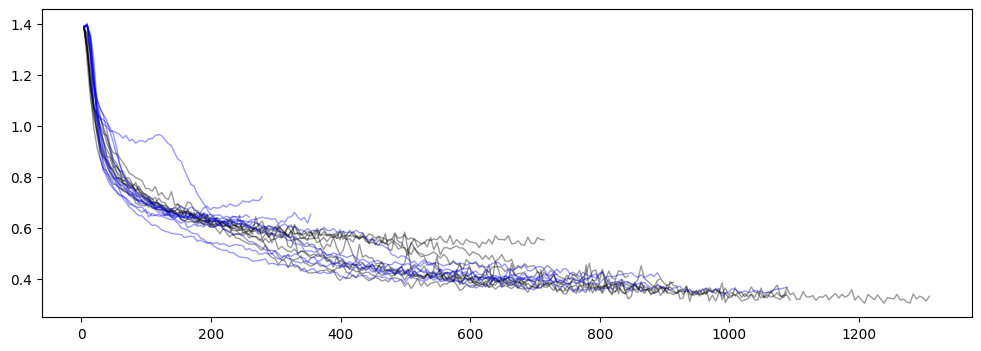

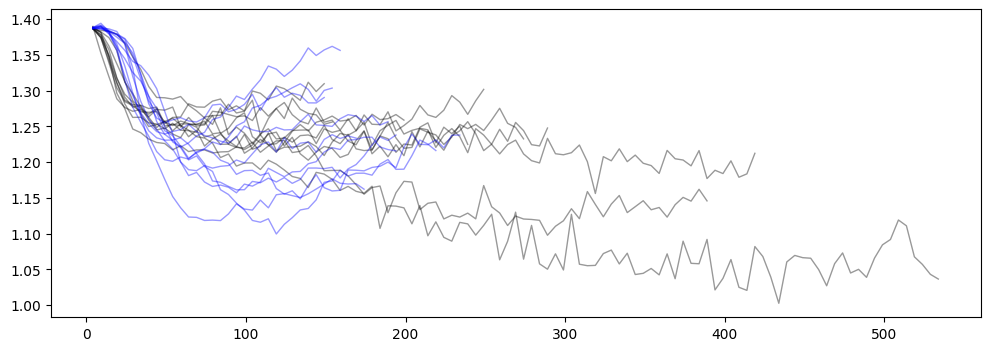

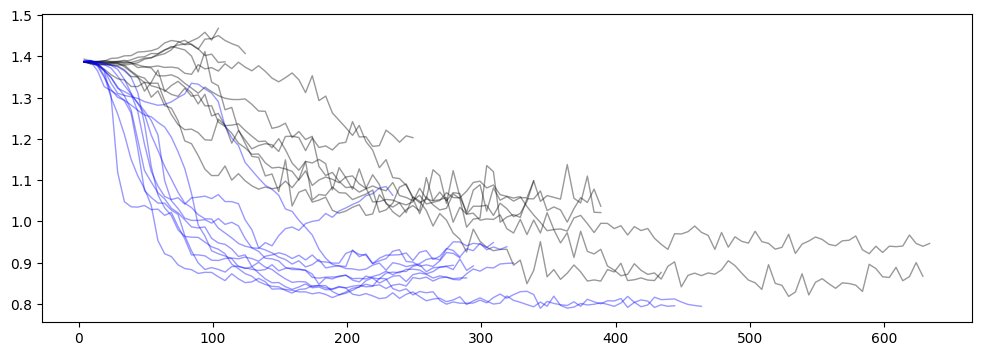

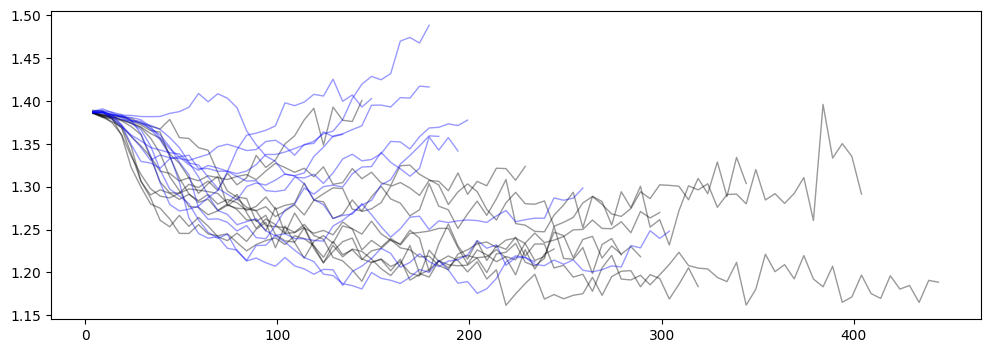

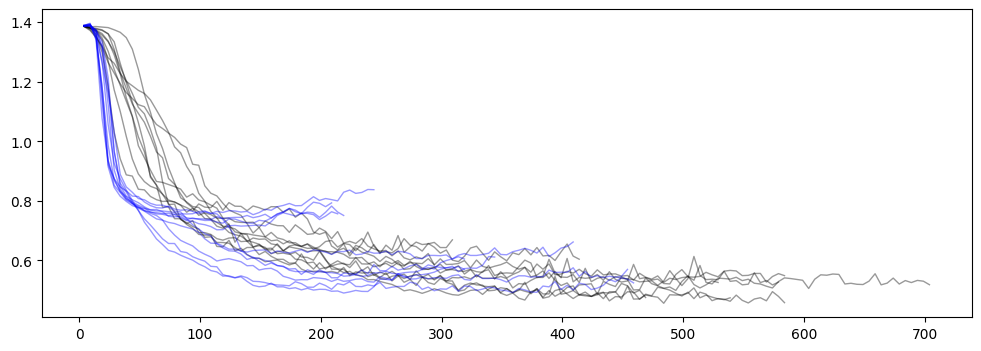

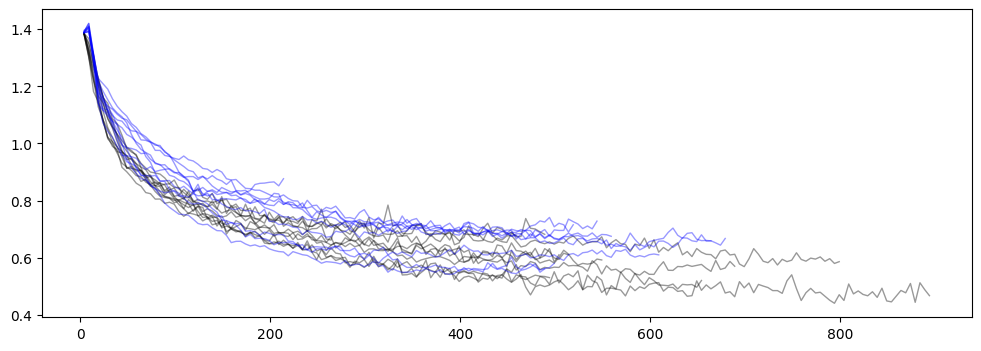

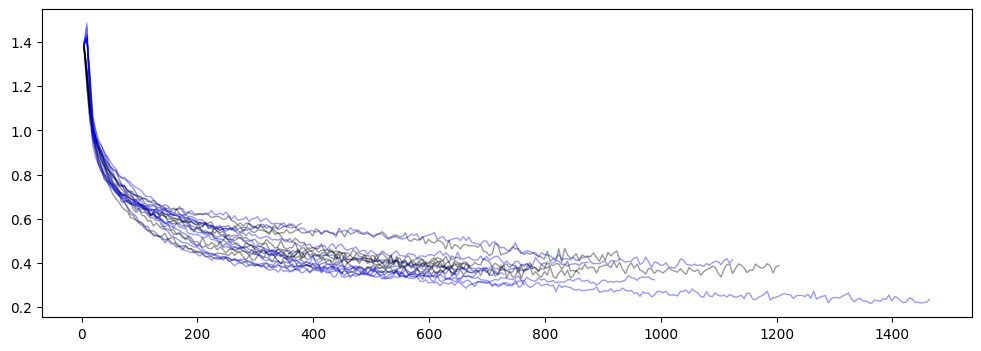

In [35]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


df = loss_df.copy()
for uid in df.uid.unique():
    fig = plt.figure(figsize=(12, 4))
    uid_df = df[df.uid == uid]
#     for alg in uid_df.algorithm.unique():
    for alg in ["None", "SOBI"]:
        alg_df = uid_df[uid_df.algorithm == alg]
        for run in alg_df.run.unique():
            run_df = alg_df[alg_df.run == run]
            run_df = run_df.sort_values(by="epoch")
            x = run_df.epoch

            y = run_df.val_loss
            std = alg_df.val_loss

            points = np.array([x, y]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            lc = LineCollection(segments, linewidths=cnt/2)

            assert len(x) == len(y)
    #         plt.gca().add_collection(lc)
            c = "k" if alg == "None" else "b"
            plt.plot(x, y, linewidth=1, c=c, alpha=.4)
#         plt.fill_between(x, y - std / 2, y + std / 2, alpha=.3)
    plt.show()

In [36]:
y.shape

(293,)

In [37]:
eegnet_path = Path("/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_18_bk/results/results_final.csv")
raw_path = Path("/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_32/results/results.csv")

eegnet_df = pd.read_csv(eegnet_path).rename(columns=dict(trial="run"))
raw_df = pd.read_csv(raw_path)

def get_default(get_fn):
    def fn(key):
        return get_fn(key, key)
    return fn

classifier_rename_dict = dict(
    mlp="MLP",
    random_forest="Random Forest",
    extra_trees="Extra Trees",
    gaussian_nb="Naïve Bayes",
    lda="LDA",
    svm_sigmoid="SVM (Sig.)",
    svm_poly="SVM (Poly)",
    svm_linear="SVM (Lin.)",
    svm_rbf="SVM (RBF)",
    logistic_l1="Log. Reg. (L1)",
    logistic_l2="Log. Reg. (L2)",
    logistic="Log. Reg.",
)

algorithm_rename_dict = {
    "ext_infomax": "Ext. Infomax",
    "infomax": "Infomax",
    "none": "None",
    "picard": "Picard",
    "picard_o": "Picard-O",
    "orica 0": "ORICA (0)",
    "orica 1": "ORICA (1)",
    "Orica (0)": "ORICA (0)",
    "Orica (1)": "ORICA (1)",
    "jade": "JADE",
    "sobi": "SOBI",
    "fastica": "FastICA",
}

eegnet_df["algorithm"] = eegnet_df.algorithm.apply(get_default(algorithm_rename_dict.get))

raw_df["algorithm"] = raw_df.algorithm.apply(get_default(algorithm_rename_dict.get))
raw_df["classifier"] = raw_df.classifier.apply(get_default(classifier_rename_dict.get))
eegnet_df.run.unique(), raw_df.run.unique()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [38]:
df = eegnet_df[["uid", "algorithm", "run", "test_cohen_kappa_score"]]
df_1 = df.query("algorithm == 'None'").rename(columns=dict(test_cohen_kappa_score="raw_Kappa")).drop("algorithm", axis=1)
df_2 = df.query("algorithm != 'None'").rename(columns=dict(test_cohen_kappa_score="Kappa"))

cols1 = ["uid", "run", "raw_Kappa"]
cols2 = ["uid", "run", "Kappa", "algorithm"]

df = df_2[cols2].merge(df_1[cols1], on=["uid", "run"])

a = (
    df
    .assign(improvement=lambda df: df.Kappa - df.raw_Kappa)
    .groupby(["uid", "algorithm"], as_index=False).mean()
    .sort_values(by=["uid", "improvement"], ascending=[True, False])
    .drop_duplicates(subset="uid")
)
b = (
    df
    .assign(improvement=lambda df: df.Kappa - df.raw_Kappa)
    .groupby(["algorithm", "uid"], as_index=False).mean()
    .groupby(["algorithm"], as_index=False).mean()
)

b

,algorithm,uid,run,Kappa,raw_Kappa,improvement
0,Ext. Infomax,5.0,4.5,0.454167,0.475772,-0.021605
1,FastICA,5.0,4.5,0.458488,0.475772,-0.017284
2,Infomax,5.0,4.5,0.447274,0.475772,-0.028498
3,JADE,5.0,4.5,0.453755,0.475772,-0.022016
4,ORICA (0),5.0,4.5,0.455504,0.475772,-0.020267
5,ORICA (1),5.0,4.5,0.427932,0.475772,-0.047840
6,Picard,5.0,4.5,0.444033,0.475772,-0.031739
7,Picard-O,5.0,4.5,0.449949,0.475772,-0.025823
8,SOBI,5.0,4.5,0.445833,0.475772,-0.029938


In [39]:
df = eegnet_df[["uid", "algorithm", "run", "test_cohen_kappa_score"]].rename(columns=dict(test_cohen_kappa_score="eegnet_Kappa"))
df = raw_df.merge(df, on=["uid", "algorithm", "run"], how="inner")

(
    df
    .groupby(["uid", "algorithm", "classifier"], as_index=False).mean()
    .assign(improvement=lambda df: df.eegnet_Kappa - df.Kappa)
    .sort_values(by=["uid", "Kappa"], ascending=[True, False])
    .drop_duplicates(subset="uid")
)

,uid,algorithm,classifier,run,Acc.,Bal. Acc.,Kappa,clf_fit_time,preprocess_fit_time,duplicated,eegnet_Kappa,improvement
111,1,SOBI,Log. Reg. (L1),4.5,0.680556,0.680556,0.574074,0.058330,0.431409,0.0,0.683333,0.109259
151,2,Infomax,Random Forest,4.5,0.435417,0.435417,0.247222,0.413442,2.753792,0.0,0.226852,-0.020370
314,3,ORICA (1),Log. Reg.,4.5,0.756944,0.756944,0.675926,0.019348,0.439594,0.0,0.655093,-0.020833
464,4,Picard-O,SVM (Lin.),4.5,0.462847,0.462847,0.283796,0.801425,2.461235,0.0,0.365741,0.081944
558,5,ORICA (1),Naïve Bayes,4.5,0.326389,0.326389,0.101852,0.006124,2.355011,0.9,0.250000,0.148148
711,6,SOBI,Log. Reg. (L1),4.5,0.458333,0.458333,0.277778,0.050649,0.321100,0.0,0.204630,-0.073148
783,7,ORICA (0),Log. Reg. (L1),4.5,0.708333,0.708333,0.611111,0.056085,0.393119,0.0,0.485185,-0.125926
934,8,Picard,SVM (RBF),4.5,0.719792,0.719792,0.626389,0.134438,5.659712,0.0,0.665278,0.038889
1076,9,SOBI,SVM (Lin.),4.5,0.746528,0.746528,0.662037,0.442638,0.308265,0.0,0.627778,-0.034259


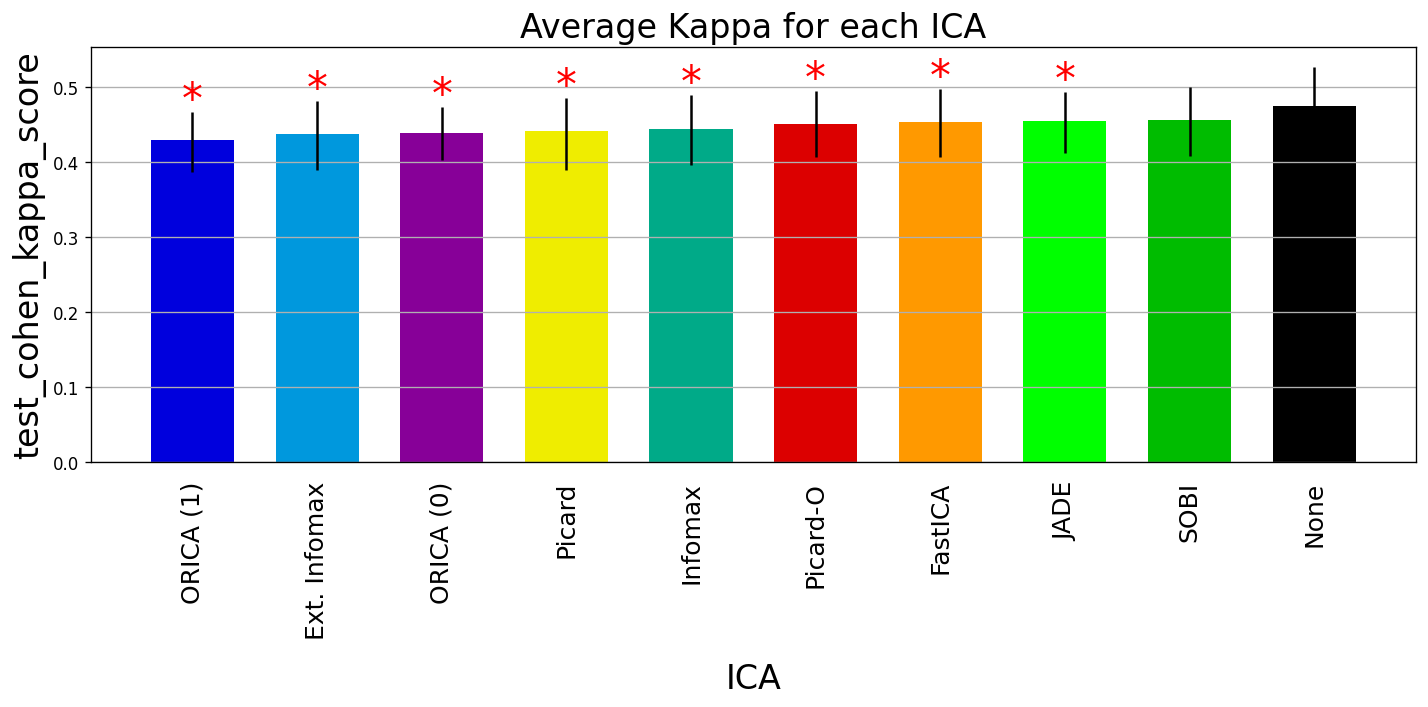

In [40]:
results_df = full_df

kwargs = dict(
    n_boots=1000,
    figsize=(12, 6),
    legend_in=None
)

average_barplot(
    results_df,
    x_col="algorithm",
    grouping_cols=["uid"],
    val_col="test_cohen_kappa_score",
    key_cols="run",
    x_label="ICA",
    title="Average Kappa for each ICA",
    labelpad=120,
    **kwargs
)



In [41]:
from statsmodels.regression.mixed_linear_model import VCSpec
import statsmodels.api as sm
df = full_df
vc = {"g2": "0 + C(algorithm)", "g4": "0 + C(uid)"}
oo = np.ones(df.shape[0])
model3 = sm.MixedLM.from_formula("test_cohen_kappa_score ~ 1", groups=oo, vc_formula=vc, data=df)
result = model3.fit()
print(result.summary())
np.sqrt(result.scale * result.params)

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: test_cohen_kappa_score
No. Observations: 900     Method:             REML                  
No. Groups:       1       Scale:              0.0060                
Min. group size:  900     Log-Likelihood:     989.4074              
Max. group size:  900     Converged:          Yes                   
Mean group size:  900.0                                             
-----------------------------------------------------------------------
                Coef.    Std.Err.      z      P>|z|    [0.025    0.975]
-----------------------------------------------------------------------
Intercept       0.448       0.072    6.231    0.000     0.307     0.589
g2 Var          0.000       0.001                                      
g4 Var          0.046       0.301                                      



/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Intercept    0.051890
g2 Var       0.009944
g4 Var       0.215471
dtype: float64

In [42]:
from scipy.stats import bootstrap, wilcoxon

a1 = "None"
a2 = "SOBI"

df1 = cnt_df.query("algorithm == @a1")
df2 = cnt_df.query("algorithm == @a2")
cols = ["algorithm", "classifier"]

cols = ["uid", "run", "kappa", "epochs"]
mcols = ["uid", "run"]
df = df1[cols].merge(df2[cols], on=mcols, how="inner")

In [43]:
(
    wilcoxon(
        df.kappa_x,
        df.kappa_y,
        alternative="greater",
        zero_method="zsplit",
    ).pvalue,
    wilcoxon(
        df.epochs_x,
        df.epochs_y,
        alternative="greater",
        zero_method="zsplit",
    ).pvalue
)

(0.05441483748926379, 1.3931230572396133e-06)

In [44]:
from scipy.stats import median_test
(
    median_test(
        df.kappa_x,
        df.kappa_y,
    ),
    median_test(
        df.epochs_x,
        df.epochs_y,
    )
)

((0.0,
  1.0,
  0.5092592592592593,
  array([[45, 44],
         [45, 46]])),
 (8.889986418076306,
  0.0028673886535873242,
  390.0,
  array([[55, 34],
         [35, 56]])))

/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approxi

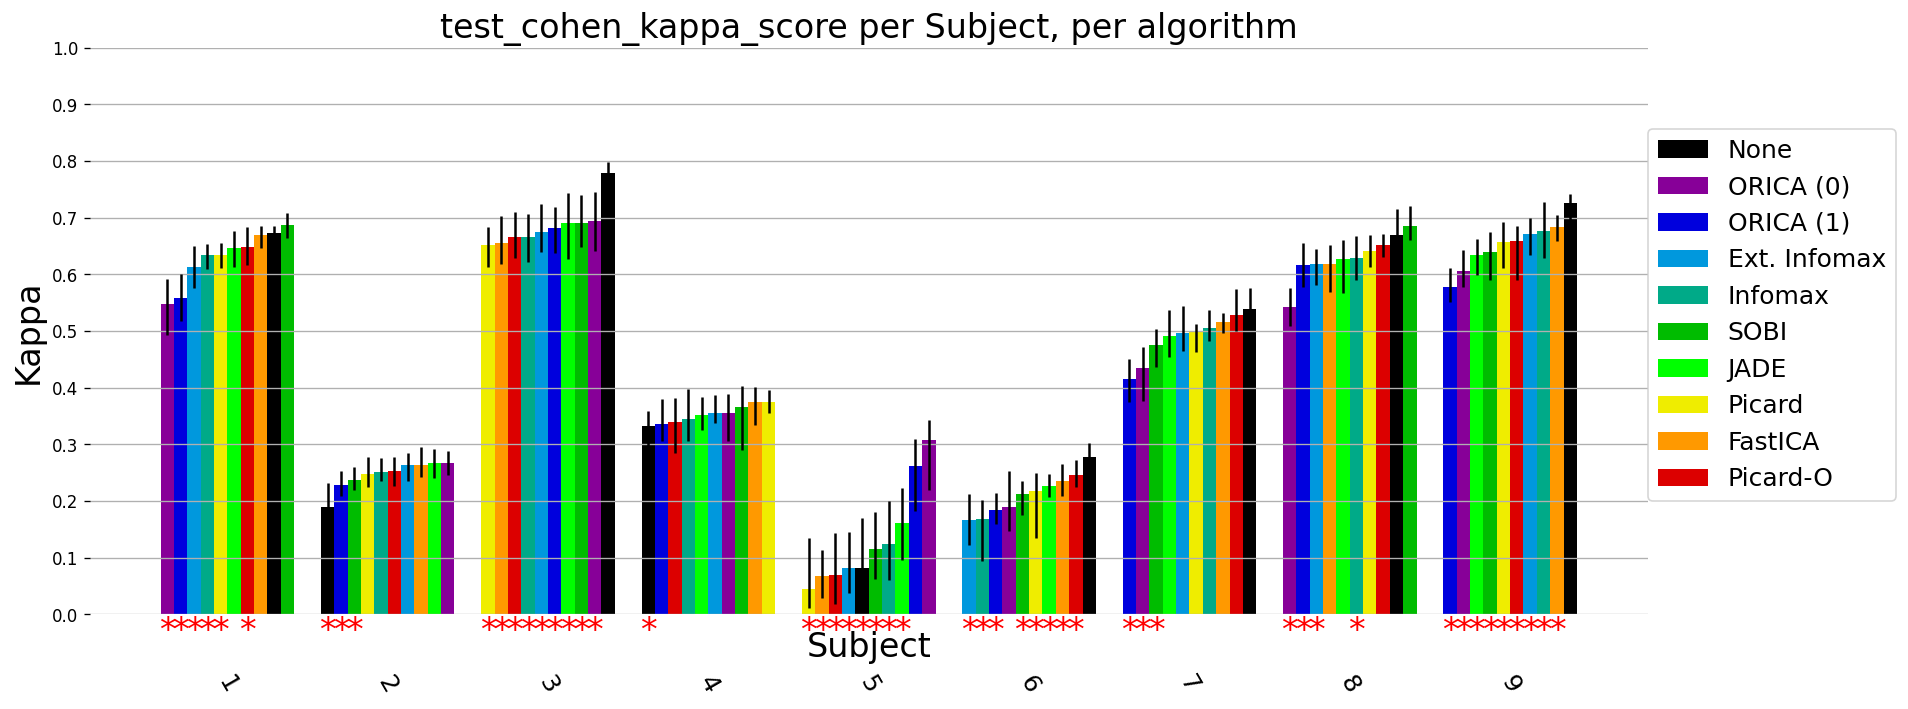

In [45]:
from ica_benchmark.visualization.multiple_runs import detailed_barplot

detailed_barplot(
    full_df,
    x_col="uid",
    hue_col="algorithm",
    val_col="test_cohen_kappa_score",
    key_cols="run",
#     save_filepath=results_folder / f"detailed_{classifier}.png",
    x_label="Subject",
    ylim=(0, 1),
    y_label="Kappa"
)